In [1]:
import sys

sys.path.append("..")

In [2]:
from tensorflow import keras
from keras_tuner import HyperParameters

In [3]:
from utils.preprocessing_utils import PreprocessingUtils

In [4]:
from utils.model_wrapper import ModelWrapper

In [5]:
preprocessing_utils = PreprocessingUtils()

Files already exist, skipping...
Loading images and labels...
Images and labels loaded successfully!
Preprocessing labels...
Labels preprocessed successfully!
Loading split data...
Split data loaded successfully!


In [6]:
def build_alex_net(hp: HyperParameters):
    model = keras.models.Sequential(name="AlexNet")

    model.add(
        keras.layers.Conv2D(
            filters=hp.Int("conv_1_filters", min_value=64, max_value=128, step=32),
            kernel_size=(11, 11),
            strides=(4, 4),
            activation="relu",
            input_shape=preprocessing_utils.images.shape[1:],
        )
    )
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2)))

    model.add(
        keras.layers.Conv2D(
            filters=hp.Int("conv_2_filters", min_value=128, max_value=256, step=64),
            kernel_size=(5, 5),
            activation="relu",
        )
    )
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2)))

    for i in range(hp.Int("additional_conv_layers", 1, 3)):  # type: ignore
        model.add(
            keras.layers.Conv2D(
                filters=hp.Int(
                    f"conv_{i+3}_filters", min_value=128, max_value=384, step=64
                ),
                kernel_size=(3, 3),
                activation="relu",
            )
        )

    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2)))

    model.add(keras.layers.Flatten())

    model.add(
        keras.layers.Dense(
            units=4096,
            activation="relu",
            kernel_regularizer=keras.regularizers.l2(1e-2),
        )
    )
    model.add(keras.layers.Dropout(0.5))

    model.add(
        keras.layers.Dense(
            units=4096,
            activation="relu",
            kernel_regularizer=keras.regularizers.l2(1e-2),
        )
    )
    model.add(keras.layers.Dropout(0.5))

    model.add(keras.layers.Dense(preprocessing_utils.num_classes, activation="softmax"))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])),  # type: ignore
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    model.summary()

    return model

In [7]:
alex_net_wrapper = ModelWrapper("AlexNet", preprocessing_utils=preprocessing_utils)

In [8]:
alex_net_wrapper.build_model(
    build_fn=build_alex_net, model_name=alex_net_wrapper.model_name
)

Removing previous random search results...
Initializing random search...
Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        23296     
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 128)       204928    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 128)      512       
 hNormalization)                                    

In [9]:
alex_net_wrapper.train_and_save_model_and_history()

Trial 10 Complete [00h 03m 19s]
val_loss: 2.6689822673797607

Best val_loss So Far: 2.1087779998779297
Total elapsed time: 00h 32m 54s
INFO:tensorflow:Oracle triggered exit


Training final model...
Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization_2 (Batc  (None, 62, 62, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 96)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 192)       460992    
                                                                 
 batch_normalization_3 (Batc  (None, 26, 26, 192)      768       
 hNormalization)                                                 
                                   

In [10]:
alex_net_wrapper.load_model_and_history()

Loading model from "../../artifacts/checkpoints/checkpoint_AlexNet.h5"...
Model loaded successfully!
Loading history from "../../artifacts/model_histories/history_AlexNet"...
History loaded successfully!


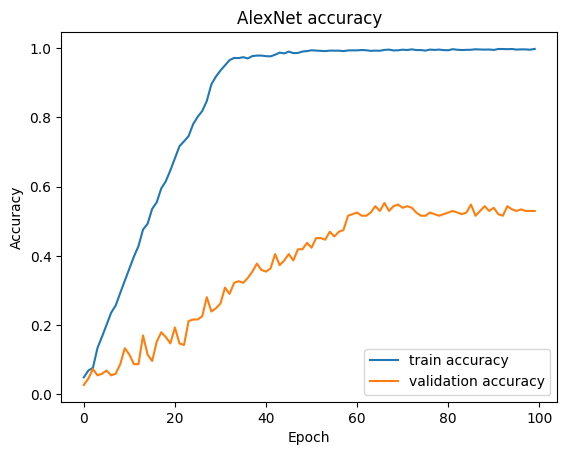

In [11]:
alex_net_wrapper.plot_accuracy()

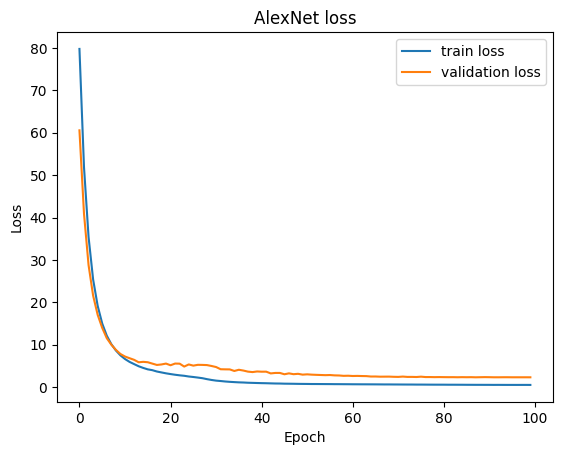

In [12]:
alex_net_wrapper.plot_loss()

20/20 [==============================] - 0s 8ms/step - loss: 2.3642 - accuracy: 0.5234
Loss: 2.3642
Accuracy: 0.5234
20/20 [==============================] - 0s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.57      0.60        23
           1       0.52      0.44      0.48        25
           2       0.58      0.65      0.61        52
           3       0.40      0.42      0.41        38
           4       0.67      0.37      0.48        27
           5       0.44      0.57      0.50        35
           6       0.50      0.38      0.43        45
           7       0.57      0.40      0.47        10
           8       0.46      0.50      0.48        12
           9       0.42      0.45      0.43        11
          10       0.46      0.52      0.49        23
          11       0.62      0.58      0.60        26
          12       0.45      0.53      0.49        32
          13       0.42      0.73      0.54       

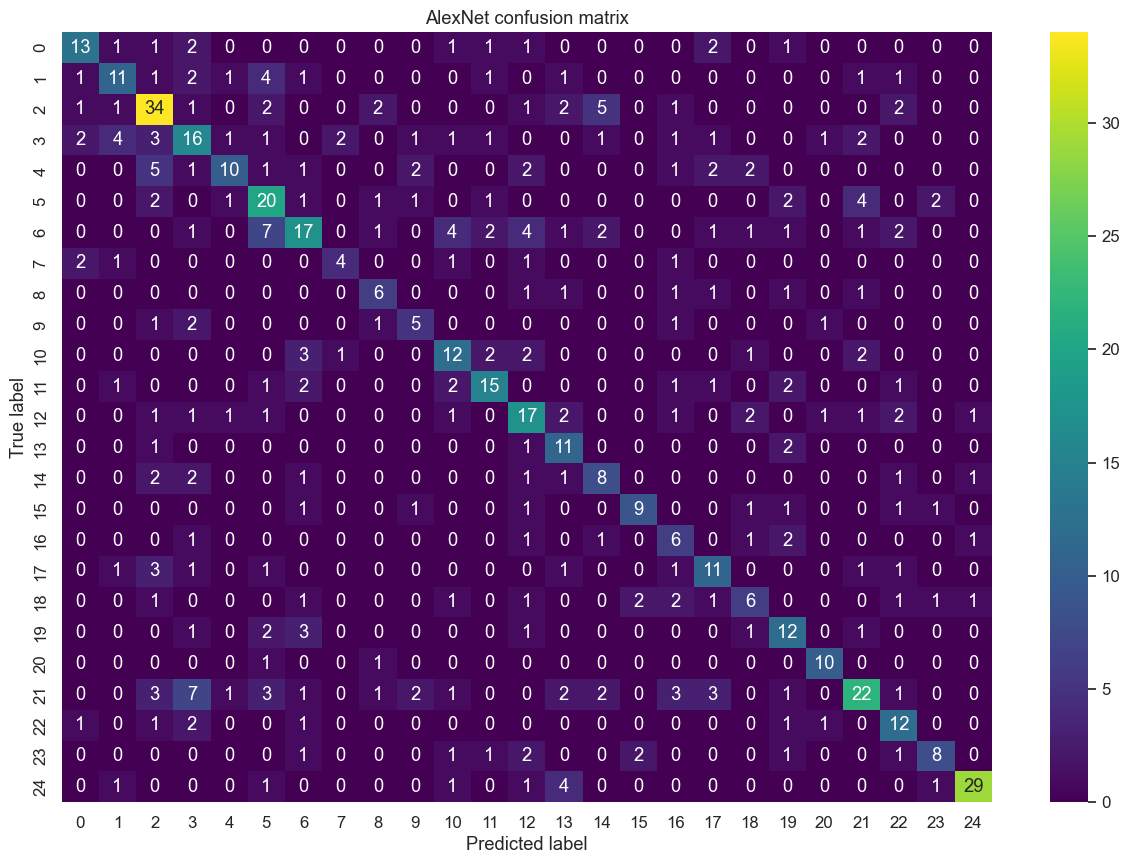

In [13]:
alex_net_wrapper.display_evaluation_results()